In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
#xyz_data = np.genfromtxt(fname=file_location, skip_header=2, dtype='unicode')

xyz = np.genfromtxt(fname=r'test data\6gtg\data_from_your_colabnotebook.xyz', skip_header=2, dtype='unicode')
xyz = np.genfromtxt(fname=r'test data\6gtg\6gtg_phosphate_centers.xyz', skip_header=2, dtype='unicode')

#print(xyz)

symbols = xyz[:, 0]
coordinates = xyz[:, 1:].astype(float)

#print(symbols)
#print(coordinates)

#print(coordinates[:,0])

#C101 & 103

# print(coordinates[100,0])
# print('\n')
# print(coordinates(102,0))

##we should figure out the scale.........

In [9]:
print(xyz)

[['X' '112.744' '115.719' '126.085']
 ['X' '111.277' '109.833' '127.574']
 ['X' '112.884' '103.858' '128.502']
 ['X' '110.118' '98.276' '127.609']
 ['X' '110.990' '99.317' '123.050']
 ['X' '108.923' '103.895' '119.846']
 ['X' '106.059' '108.600' '119.178']
 ['X' '103.858' '113.131' '121.613']
 ['X' '102.905' '116.495' '126.444']
 ['X' '104.038' '116.531' '133.176']
 ['X' '104.119' '114.324' '139.518']
 ['X' '104.779' '108.271' '140.743']
 ['X' '109.446' '104.546' '141.719']
 ['X' '110.946' '101.218' '135.975']
 ['X' '103.980' '101.774' '136.331']
 ['X' '98.626' '103.168' '135.616']
 ['X' '94.696' '102.363' '131.678']
 ['X' '93.037' '100.527' '126.271']
 ['X' '94.523' '97.840' '121.121']
 ['X' '96.927' '94.649' '117.966']
 ['X' '102.291' '95.106' '115.687']
 ['X' '107.803' '93.644' '112.181']
 ['X' '110.638' '91.661' '107.915']
 ['X' '111.074' '90.923' '102.105']
 ['X' '109.157' '91.856' '96.685']
 ['X' '105.822' '94.290' '92.359']
 ['X' '101.368' '98.876' '90.514']
 ['X' '97.689' '103.

[[112.744 115.719 126.085]
 [ 87.332 137.773  84.854]
 [105.757 137.865  94.802]
 [105.149  71.969 116.553]
 [103.969  64.875 116.983]
 [104.845  59.659 112.727]
 [105.433  57.917 105.962]
 [109.437  56.984 101.156]
 [114.78   60.655  98.21 ]
 [126.355  61.524 102.948]
 [130.241  59.918 108.653]
 [130.648  54.845 113.104]
 [126.427  42.899 104.699]
 [117.424  50.685 115.37 ]
 [119.767  57.536 117.235]
 [119.562  68.55  111.277]
 [112.283  69.852 100.157]
 [ 91.6    68.339 102.137]
 [ 84.442  69.06  103.971]
 [ 77.411  79.557 105.388]]


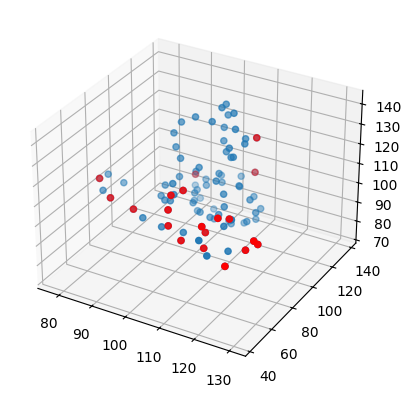

In [10]:
#indexing

coordinates = xyz[:, 1:].astype(float)

distances = np.zeros(len(xyz))

indexes = np.zeros(len(xyz))

i=0
j=0
k=0
index = 0

while(i<len(xyz)):
  while(j<len(xyz)):
    if(np.sqrt((coordinates[i,0]-coordinates[j,0])**2 + (coordinates[i,1]-coordinates[j,1])**2 + (coordinates[i,2]-coordinates[j,2])**2) < 7.00):
      if(i!=j):
        index = index+1
    j=j+1

  if(index==1):
      indexes[i]=1
  if(index==2):
      indexes[i]=2
  i=i+1
  j=0
  index=0

#

#separating into 1° and 2°

index1 = np.zeros(len(xyz))
index2 = np.zeros(len(xyz))

red = np.array(coordinates)
blue = np.array(coordinates)

i=0

while(i<len(indexes)):
  if(indexes[i]!=1):
    red[i] = 0
  if(indexes[i]!=2):
    blue[i] = 0
  i=i+1



zz = 0
q = 0
while(zz<len(red)):
  if(not np.all(red[zz] == 0)):
    if(q==0):
      cleanred = red[zz]
      q=q+1
    else:
      cleanred = np.vstack((cleanred,red[zz]))
  zz=zz+1

print(cleanred)

# graphing

fig = plt.figure()
ax = plt.axes(projection='3d')

sequence_containing_x_vals = coordinates[:,0]
sequence_containing_y_vals = coordinates[:,1]
sequence_containing_z_vals = coordinates[:,2]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)

redx = cleanred[:,0]
redy = cleanred[:,1]
redz = cleanred[:,2]

ax.scatter(redx, redy, redz, color='red')

plt.show()



In [11]:
print(indexes)

idex = []

a = 0
while(a<len(indexes)):
  if(indexes[a]==1):
    idex.append(a)
  a=a+1

[1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 1. 1. 2. 2. 1. 1. 2. 1. 0. 1. 2. 2. 2. 1. 1. 2. 1. 0. 0.]


In [12]:
import numpy as np
import random

# Calculate the Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

# Create a distance matrix with a threshold for maximum allowable distance (7 units)
def create_distance_matrix(points, max_distance=7):
    num_points = len(points)
    distance_matrix = {}
    for i in range(num_points):
        distance_matrix[i] = {}
        for j in range(num_points):
            distance = euclidean_distance(points[i], points[j])
            # Only include distances <= max_distance
            distance_matrix[i][j] = distance if distance <= max_distance else float('inf')
    return distance_matrix

# Attempt to form a TSP route from a depot, connecting at least one non-depot point
def attempt_route(depot, points, distance_matrix, used_points, depots, max_distance=7):
    route = [depot]
    current_point = depot
    possible_connections = []

    # Find at least one valid connection to a non-depot point
    for i in range(len(points)):
        if i != depot and i not in used_points and i not in depots:  # Exclude depot and already used points
            distance = distance_matrix[current_point][i]
            if distance <= max_distance:
                possible_connections.append(i)

    # If no valid connection found, return an empty route
    if not possible_connections:
        return []

    # Choose the first valid connection
    next_point = random.choice(possible_connections)
    route.append(next_point)
    used_points.add(next_point)

    # Now form the rest of the route using the nearest neighbor approach
    while len(route) < len(points) and len(used_points) < len(points):
        current_point = route[-1]
        nearest_point = None
        min_distance = float('inf')

        # Find the nearest non-depot point that hasn't been used yet
        for i in range(len(points)):
            if i != current_point and i not in used_points and i not in depots:
                distance = distance_matrix[current_point][i]
                if distance < min_distance and distance <= max_distance:
                    min_distance = distance
                    nearest_point = i

        if nearest_point is None:  # No valid connection left
            break

        route.append(nearest_point)
        used_points.add(nearest_point)

    # If the route has only 1 depot and 1 non-depot, or the route only returns to depot, discard it
    if len(route) == 2:
        return []  # Discard routes with only two points (depot and one non-depot)

    # If route doesn't end with a depot, force it to connect to a depot
    if route and route[-1] not in depots:
        # Find the closest depot to the last point
        last_point = route[-1]
        closest_depot = min(depots, key=lambda depot: distance_matrix[last_point][depot])
        route.append(closest_depot)

    # If the route has at least 2 points and doesn't return to the same depot, return it
    if len(route) > 1 and route[0] != route[-1]:  # Check if route doesn't loop back to start
        return route
    else:
        return []

# Main TSP process for iterating through depots
def run_tsp(points, depots, distance_matrix):
    used_points = set()
    all_routes = []
    remaining_depots = set(depots)

    # Continue until no depots remain or only impossible depots are left
    while remaining_depots:
        depot = random.choice(list(remaining_depots))  # Pick a random depot
        route = attempt_route(depot, points, distance_matrix, used_points, remaining_depots)

        if route:
            all_routes.append(route)
            remaining_depots.remove(depot)  # Remove the depot from future possibilities
        else:
            remaining_depots.remove(depot)  # Remove depot if no valid route can be formed

    return all_routes

# Main execution
distance_matrix = create_distance_matrix(coordinates)

# Run TSP and get the routes
routes = run_tsp(coordinates, idex, distance_matrix)

# Output the routes
if routes:
    for i, route in enumerate(routes):
        print(f"Route {i+1}: {route}")
else:
    print("No valid routes could be formed.")


Route 1: [81, 82, 83, 84, 85]
Route 2: [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
Route 3: [73, 74, 75, 76]
Route 4: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


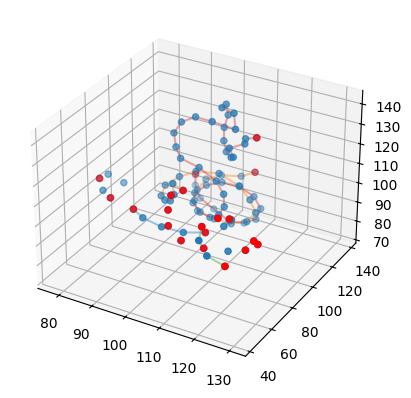

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')

#graph original coords

sequence_containing_x_vals = coordinates[:,0]
sequence_containing_y_vals = coordinates[:,1]
sequence_containing_z_vals = coordinates[:,2]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)

##graph each TSP

for i in range(len(routes)):
  routex = coordinates[routes[i],0]
  routey = coordinates[routes[i],1]
  routez = coordinates[routes[i],2]

  ax.plot(routex, routey, routez,alpha=0.4)

##graph 1°
redx = cleanred[:,0]
redy = cleanred[:,1]
redz = cleanred[:,2]

ax.scatter(redx, redy, redz, color='red')

plt.show()

In [ ]:
# pip install ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-datastore 2.19.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.26.1 which is incompatible.
google-cloud-firestore 2.16.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!

In [14]:
# print(xyz[10])

x0 = coordinates[25,0]
y0 = coordinates[25,1]
z0 = coordinates[25,2]

# print(coordinates)

# print(x0)
# print(y0)
# print(z0)

distances = np.zeros(len(xyz))

indexes = np.zeros(len(xyz))

i=0
j=0
k=0
index = 0

while(i<len(xyz)):
  while(j<len(xyz)):
    if(np.sqrt((coordinates[i,0]-coordinates[j,0])**2 + (coordinates[i,1]-coordinates[j,1])**2 + (coordinates[i,2]-coordinates[j,2])**2) < 7.00):
      if(i!=j):
        # print("this is a potential bond")
        # print(i)
        # print(j)
        index = index+1
    j=j+1

  if(index==1):
      indexes[i]=1
  if(index==2):
      indexes[i]=2
  i=i+1
  j=0
  index=0

# i=0
# while(i<len(xyz)):
#   distances[i] = np.sqrt((x0-coordinates[i,0])**2 + (y0-coordinates[i,1])**2 + (z0-coordinates[i,2])**2)
#   i = i+1

# # print(distances)

# j=0
# while(j<len(xyz)):
#   if(distances[j]<7.00):
#     print(j)
#     print(distances[j])
#   j = j+1

#10 has 1 bond connection, likely 1°
#25 has 2, likely 2°

# A = np.array([x0,y0,z0])
# B = np.array([coordinates[28,0],coordinates[28,1],coordinates[28,2]])
# C = np.array([coordinates[29,0],coordinates[29,1],coordinates[29,2]])

# AB = B-A
# BC = C-B
# dot_product = np.dot(AB,BC)
# magnitude_AB = np.linalg.norm(AB)
# magnitude_BC = np.linalg.norm(BC)

# cosine_theta = dot_product / (magnitude_AB * magnitude_BC)
# theta = np.arccos(cosine_theta)
# deg = np.degrees(theta)

# print(deg)

# fig = plt.figure()
# ax = plt.axes(projection='3d')

# sequence_containing_x_vals = np.array([x0, coordinates[28,0], coordinates[29,0]])
# sequence_containing_y_vals = np.array([y0, coordinates[28,1], coordinates[29,1]])
# sequence_containing_z_vals = np.array([z0, coordinates[28,2], coordinates[29,2]])

# ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
# ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
# plt.show()


In [15]:
print(indexes)

index1 = np.zeros(len(xyz))
index2 = np.zeros(len(xyz))

# i=0
# while(i<len(xyz)):
#   if(indexes[i]==1):
#     index1[i] = 1
#   if(indexes[i]=2):
#     index2[i] = 2
#   i=i+1

red = coordinates
blue = coordinates


i=0

# print(coordinates)
# print(red)

while(i<len(indexes)):
  if(indexes[i]!=1):
    red[i] = 0
  if(indexes[i]!=2):
    blue[i] = 0
    # print(indexes[i])
  i=i+1

# print(red)
# print(blue)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2.
 1. 2. 2. 1. 2. 2. 0. 2. 1. 2. 0. 1. 1. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 1.
 1. 1. 2. 2. 2. 1. 2. 2.]


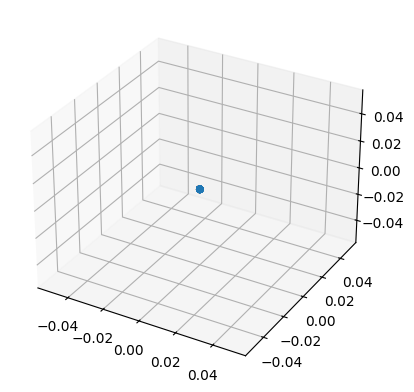

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')

sequence_containing_x_vals = coordinates[:,0]
sequence_containing_y_vals = coordinates[:,1]
sequence_containing_z_vals = coordinates[:,2]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()

In [ ]:
# pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 84.0 MB/s eta 0:00:00
  Attempting uninstall: biopython
    Found existing installation: biopython 1.79
    Uninstalling biopython-1.79:
      Successfully uninstalled biopython-1.79
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prody 2.4.1 requires biopython<=1.79, but you have biopython 1.84 which is incompatible.


In [ ]:
# pip install biopandas prody

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 48.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 72.5 MB/s eta 0:00:00
Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Created wheel for prody: filename=ProDy-2.4.1-cp310-cp310-linux_x86_64.whl size=22368535 sha256=f6c9e7eaff0dfc127c1ef5747437fd2d0ff86dfc2a9b28513c2f481a6a65cbe8
  Stored in directory: /root/.cache/pip/wheels/00/ec/aa/f2842cee2805f22126b5ed9a11d46984f0c116262ccb54b83e
Successfully built prody
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstal

In [17]:
import pandas as pd
from biopandas.pdb import PandasPdb
from prody import parsePDBHeader
from typing import Optional

def read_pdb_to_dataframe(
    pdb_path: Optional[str] = None,
    model_index: int = 1,
    parse_header: bool = True,
    ) -> pd.DataFrame:
    """
    Read a PDB file, and return a Pandas DataFrame containing the atomic coordinates and metadata.

    Args:
        pdb_path (str, optional): Path to a local PDB file to read. Defaults to None.
        model_index (int, optional): Index of the model to extract from the PDB file, in case
            it contains multiple models. Defaults to 1.
        parse_header (bool, optional): Whether to parse the PDB header and extract metadata.
            Defaults to True.

    Returns:
        pd.DataFrame: A DataFrame containing the atomic coordinates and metadata, with one row
            per atom
    """
    atomic_df = PandasPdb().read_pdb(pdb_path)
    if parse_header:
        header = parsePDBHeader(pdb_path)
    else:
        header = None
    atomic_df = atomic_df.get_model(model_index)
    if len(atomic_df.df["ATOM"]) == 0:
        raise ValueError(f"No model found for index: {model_index}")

    return pd.concat([atomic_df.df["ATOM"], atomic_df.df["HETATM"]]), header

ModuleNotFoundError: No module named 'biopandas'

In [ ]:
df,df2 = read_pdb_to_dataframe(pdb_path='/content/drive/MyDrive/TEST/TESTPDB.pdb', parse_header=True)

In [ ]:
df

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx,model_id
0,ATOM,1,,C1,,UNK,,a,1,,...,125.069,73.928,1.0,0.0,,,C,NaN,1,1
1,ATOM,2,,C2,,UNK,,a,1,,...,127.488,75.366,1.0,0.0,,,C,NaN,2,1
2,ATOM,3,,C3,,UNK,,a,1,,...,123.119,75.782,1.0,0.0,,,C,NaN,3,1
3,ATOM,4,,C4,,UNK,,a,1,,...,130.184,77.891,1.0,0.0,,,C,NaN,4,1
4,ATOM,5,,C5,,UNK,,a,1,,...,122.854,80.051,1.0,0.0,,,C,NaN,5,1
5,ATOM,6,,C6,,UNK,,a,1,,...,133.921,81.309,1.0,0.0,,,C,NaN,6,1
6,ATOM,7,,C7,,UNK,,a,1,,...,108.953,82.687,1.0,0.0,,,C,NaN,7,1
7,ATOM,8,,C8,,UNK,,a,1,,...,111.545,82.869,1.0,0.0,,,C,NaN,8,1
8,ATOM,9,,C9,,UNK,,a,1,,...,107.447,84.176,1.0,0.0,,,C,NaN,9,1
9,ATOM,10,,C10,,UNK,,a,1,,...,115.627,84.329,1.0,0.0,,,C,NaN,10,1


In [ ]:
# pip install pdbreader

In [ ]:
import pdbreader

In [ ]:
pdb = pdbreader.read_pdb('/content/drive/MyDrive/TEST/TESTPDB.pdb')

In [ ]:
print(df['atom_name'])

0      C1
1      C2
2      C3
3      C4
4      C5
5      C6
6      C7
7      C8
8      C9
9     C10
10    C11
11    C12
12    C13
13    C14
14    C15
15    C16
16    C17
17    C18
18    C19
19    C20
20    C21
21    C22
22    C23
23    C24
24    C25
25    C26
26    C27
27    C28
28    C29
29    C30
30    C31
31    C32
32    C33
33    C34
34    C35
35    C36
36    C37
37    C38
38    C39
39    C40
40    C41
41    C42
42    C43
43    C44
44    C45
45    C46
46    C47
47    C48
48    C49
49    C50
50    C51
51    C52
52    C53
53    C54
54    C55
55    C56
Name: atom_name, dtype: object


In [ ]:
print(pdb['ATOM'])

##SCALE IS IN ANGSTROMS ALREADY !!!!!!!!!!!!
##MODEL ID IS THE STRAND NUMBER
#BRUH

      model_id    id  name loc_indicator resname chain  resid res_icode  \
0            0     1    C1          None     UNK     a    1.0      None   
1            0     2    C2          None     UNK     a    1.0      None   
2            0     3    C3          None     UNK     a    1.0      None   
3            0     4    C4          None     UNK     a    1.0      None   
4            0     5    C5          None     UNK     a    1.0      None   
...        ...   ...   ...           ...     ...   ...    ...       ...   
1312         2  1166  C116          None     UNK     a    1.0      None   
1313         2  1167  C116          None     UNK     a    1.0      None   
1314         2  1168  C116          None     UNK     a    1.0      None   
1315         2  1169  C116          None     UNK     a    1.0      None   
1316         2  1170  C117          None     UNK     a    1.0      None   

            x        y        z  occupancy  b_factor segment element charge  
0     101.529  125.06

In [ ]:
print(pdb)

{'ATOM':       model_id    id  name loc_indicator resname chain  resid res_icode  \
0            0     1    C1          None     UNK     a    1.0      None   
1            0     2    C2          None     UNK     a    1.0      None   
2            0     3    C3          None     UNK     a    1.0      None   
3            0     4    C4          None     UNK     a    1.0      None   
4            0     5    C5          None     UNK     a    1.0      None   
...        ...   ...   ...           ...     ...   ...    ...       ...   
1312         2  1166  C116          None     UNK     a    1.0      None   
1313         2  1167  C116          None     UNK     a    1.0      None   
1314         2  1168  C116          None     UNK     a    1.0      None   
1315         2  1169  C116          None     UNK     a    1.0      None   
1316         2  1170  C117          None     UNK     a    1.0      None   

            x        y        z  occupancy  b_factor segment element charge  
0     101.52

In [ ]:
# print(pdb['ATOM']['name'])

i=0
j=0
while(i<1317):
  if (pdb['ATOM']['name'][i]=='C1'):
    print('C1 index:')
    print([i])
  if(pdb['ATOM']['name'][i]=='C20'):
    print('C20 index:')
    print([j])
  i = i+1
  j = j+1

  ##index 247 is c101 1
##index 249 is c103 1

C1 index:
[0]
C20 index:
[19]
C1 index:
[147]
C20 index:
[166]


In [ ]:
x1 = pdb['ATOM']['x'][147]
y1 = pdb['ATOM']['y'][147]
z1 = pdb['ATOM']['z'][147]

x3 = pdb['ATOM']['x'][166]
y3 = pdb['ATOM']['y'][166]
z3 = pdb['ATOM']['z'][166]

print(np.sqrt((x1-x3)**2 + (y1-y3)**2 + (z1-z3)**2))

5.0990195135927845


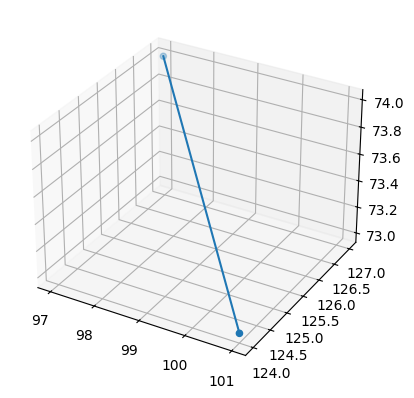

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

sequence_containing_x_vals2 = [x1,x3]
sequence_containing_y_vals2 = [y1,y3]
sequence_containing_z_vals2 = [z1,z3]

ax.scatter(sequence_containing_x_vals2, sequence_containing_y_vals2, sequence_containing_z_vals2)
ax.plot(sequence_containing_x_vals2, sequence_containing_y_vals2, sequence_containing_z_vals2)
plt.show()